In [2]:
import numpy as np
from prettytable import PrettyTable

T=11
states_range = [-10,11]
action_range = [0,10]
random_demand = [0,10]
to_add = 10
p=1
a,b=2,3

def h(X):
    if X >= 0:
        return a * X
    else:
        return -b * X

def check(state):
    return state>=states_range[0] and state<states_range[1]

def cost(X,U):
    return h(X)+p*U

V=np.zeros((T+2,states_range[1]-states_range[0]))

Demand = [np.random.randint(random_demand[0], random_demand[1]) for _ in range(T + 10)]

for _ in range(1000000):

    for s in range(states_range[0], states_range[1]):
       V[T][s + to_add] = h(s)

    for t in range(T-1,-1,-1):
        for X in range(states_range[0],states_range[1]):
            min_cost = float('inf')
            temp_cost = 0
            cnt=0
            for U in range(action_range[0],action_range[1]):
                # next_state = X+U-np.random.randint(random_demand[0],random_demand[1])
                next_state = X+U-Demand[t]
                if(check(next_state)):
                    temp_cost += cost(next_state,U)+V[t+1][next_state + to_add]
                    cnt+=1
            if(cnt>0):
                temp_cost/=cnt
                if temp_cost<min_cost:
                    min_cost = temp_cost
                V[t][X+to_add] = min_cost

# Print Policy from V
policy = np.zeros((T + 1,states_range[1]-states_range[0] + 1))
for t in range(T + 1):
    for X in range(states_range[0],states_range[1] + 1):
        min_cost = float('inf')
        for U in range(action_range[0],action_range[1] + 1):
            # next_state = X+U-np.random.randint(random_demand[0],random_demand[1])
            next_state = X+U-Demand[t]
            # next_state = X+U
            if(check(next_state)):
                temp_cost = cost(next_state,U)+V[t+1][next_state+to_add]
                if temp_cost<min_cost:
                    min_cost = temp_cost
                    policy[t][X+to_add] = U

In [21]:
import numpy as np
import random
import math

T = 10
epsilon = 1
gamma = 1
lamda = 0.1
alpha = 1
a = 2
b = 3
p = 1
df = 0.99
policy = {}
action_space = 10
state_space = 10
to_add = state_space

Q = np.full((T+1, 2*state_space+1, action_space+1),1e18)

def h(X):
    if X >= 0:
        return a * X
    else:
        return -b * X

def policy(state , time):
    if random.random() < epsilon:
        return np.random.randint(action_space+1)
    else:
        return np.argmin(Q[time][state + to_add])

num_episodes = 1000000

def policy(state , time):
    if np.random.rand() < epsilon:
        return np.random.randint(action_space+1)
    else:
        return np.argmin(Q[time][state + to_add])

start_states=[]
cost_arr=[]

for epi_idx in range(num_episodes):
    
#     if epi_idx % 1000 == 0:
#         print(epi_idx)

    epsilon = epsilon * 0.9999
    alpha = alpha * 0.9999

    episode = []

    E = np.zeros((T+1, 2*state_space+1, action_space+1))

    t=random.randint(0,T)
    start_time = t
    curr_state = epi_idx % (2 * state_space + 1) - state_space
    start_state = curr_state
    action = random.randint(0,action_space)
    start_action = action
    
    reward_curr = 0
    start_states.append((curr_state+to_add,t))

    while t < T:
        
        next_state = max(-state_space, min(state_space, curr_state + action - random.randint(0,10)))
        next_action = policy(next_state, t+1)
        cost = h(next_state) + p * action
        delta = cost + gamma * Q[t+1][next_state + to_add][next_action] - Q[t][curr_state + to_add][action]
        E[t][curr_state + to_add][action] = E[t][curr_state + to_add][action] + 1
        
        for time in range(0,T+1):
            for state in range(-state_space,state_space+1):
                for action in range(0,action_space+1):
                    Q[time][state + to_add][action] = Q[time][state + to_add][action] + alpha * delta * E[time][state + to_add][action]
                    E[time][state + to_add][action] = gamma * lamda * E[time][state + to_add][action]
        
        reward_curr=cost*math.pow(df,t-start_states[-1][1])
        curr_state = next_state
        action = next_action
        t += 1
    cost_arr.append(cost)

In [41]:
regrets=[]
V = V.T
for i in range(0,len(start_states)):
    regrets.append(V[start_states[i]] - cost_arr[i])

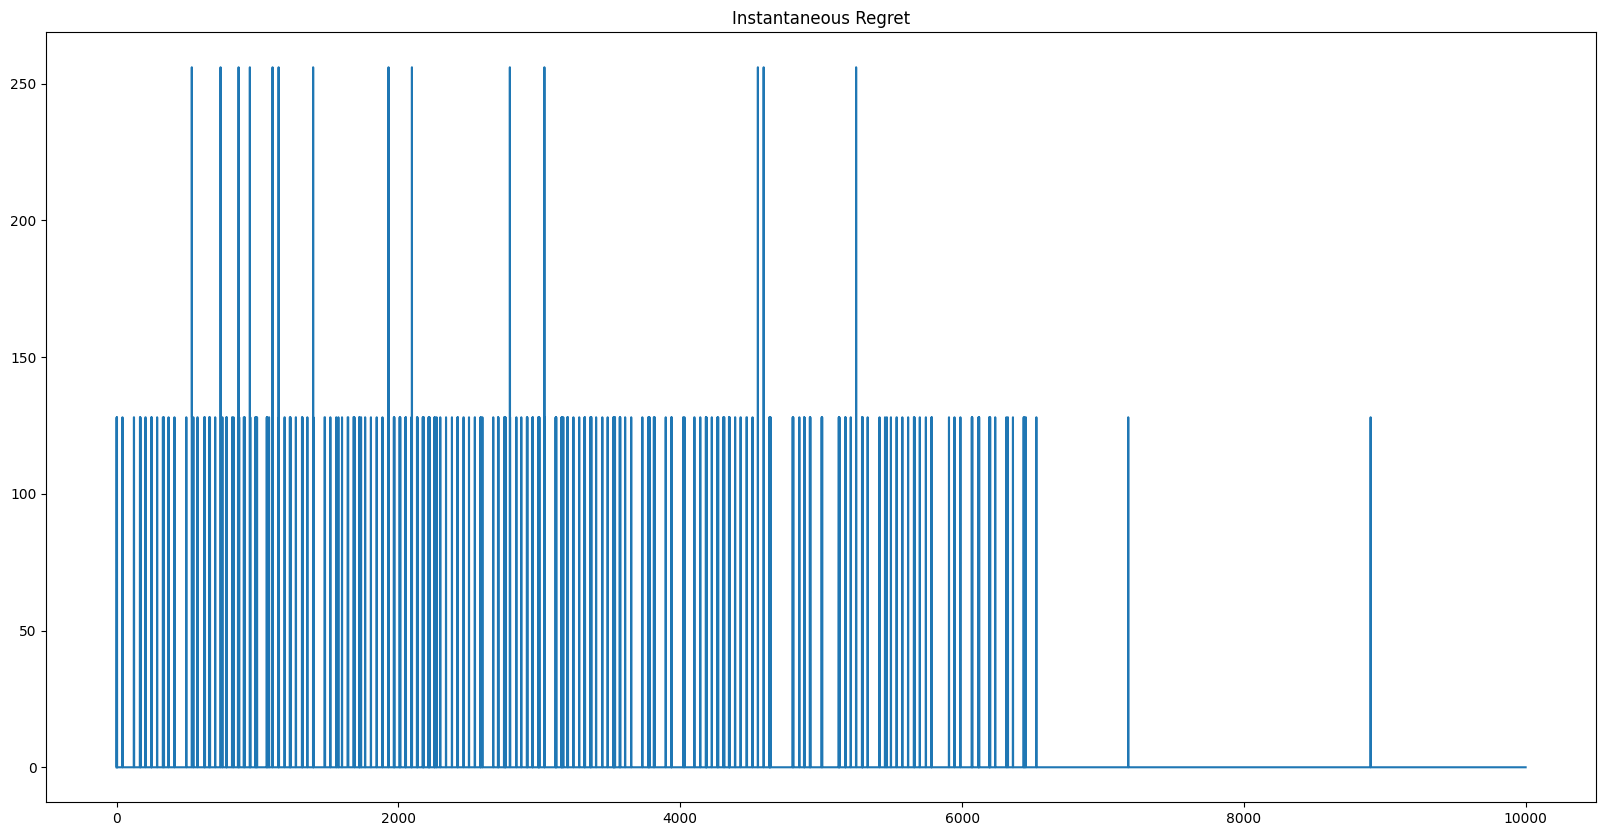

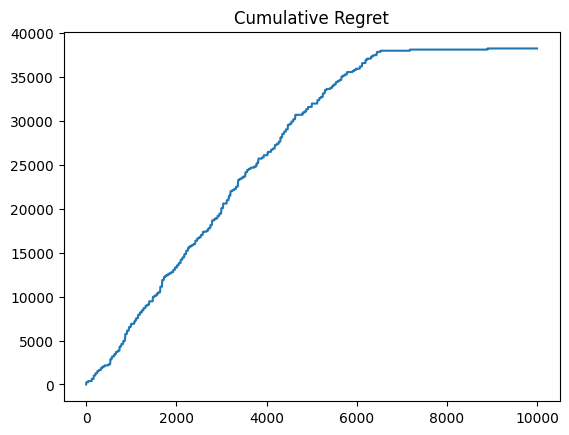

In [43]:
import matplotlib.pyplot as plt

# plot the instataneous regret
regrets_downsampled = regrets[:10000]
plt.figure(figsize=(10, 6))
plt.plot(regrets_downsampled)
plt.title("Instantaneous Regret")
plt.show()

#plot the cumulative regret
arr_tot = np.cumsum(regrets)
plt.plot(arr_tot[:10000])
plt.title("Cumulative Regret")
plt.show()

In [26]:
'''
Find optimal action at stage n, state i
'''

from prettytable import PrettyTable

optimal_action = [[0 for _ in range(2*state_space+1)] for _ in range(T+1)] # stages * states

for n in range(T):
    for i in range(-start_state, state_space + 1):
        optimal_action[n][i + to_add] = np.argmin(Q[n][i + to_add])

# Create a PrettyTable
table = PrettyTable()

# Add column headers
col_labels = list( range(-state_space, state_space+1) )
table.field_names = [""] + col_labels

# Add rows with values
row_labels = list( range(T) )
for i in range(len(row_labels)):
    table.add_row([row_labels[i]] + optimal_action[i])

# Print the table
print(table)

+---+-----+----+----+----+----+----+----+----+----+----+---+---+---+---+---+---+---+---+---+---+----+
|   | -10 | -9 | -8 | -7 | -6 | -5 | -4 | -3 | -2 | -1 | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
+---+-----+----+----+----+----+----+----+----+----+----+---+---+---+---+---+---+---+---+---+---+----+
| 0 |  10 | 10 | 10 | 9  | 10 | 9  | 8  | 10 | 10 | 9  | 8 | 7 | 6 | 5 | 4 | 3 | 2 | 1 | 0 | 0 | 0  |
| 1 |  10 | 9  | 10 | 10 | 10 | 10 | 10 | 10 | 10 | 9  | 8 | 7 | 6 | 5 | 4 | 3 | 2 | 1 | 0 | 0 | 2  |
| 2 |  9  | 10 | 9  | 8  | 7  | 6  | 5  | 4  | 3  | 2  | 1 | 0 | 2 | 1 | 0 | 0 | 1 | 0 | 0 | 0 | 0  |
| 3 |  9  | 10 | 10 | 10 | 10 | 10 | 10 | 10 | 9  | 8  | 7 | 6 | 5 | 4 | 3 | 2 | 1 | 0 | 1 | 0 | 1  |
| 4 |  10 | 10 | 10 | 10 | 10 | 10 | 9  | 10 | 9  | 10 | 9 | 8 | 7 | 6 | 5 | 4 | 3 | 2 | 1 | 0 | 1  |
| 5 |  9  | 10 | 10 | 9  | 10 | 10 | 9  | 8  | 7  | 6  | 5 | 4 | 3 | 2 | 1 | 0 | 0 | 0 | 0 | 0 | 0  |
| 6 |  9  | 10 | 9  | 10 | 10 | 10 | 10 | 9  | 8  | 7  | 6 | 5 | 4 | 3 | 2 | 1 | 0